### This script contains the following:  

1. Importing libraries and data and renaming columns  
2. Standadizing the data  
3. The elbow technique  
4. k-means clustering  

#### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# create a path
path = r'/Users/macbook/Library/CloudStorage/OneDrive-Personal/Data Analisys/Boat Sales'

In [4]:
# load data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'boat_data_cleaned.csv'), index_col = 0)

In [5]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country,City,Pricing Category,Boat Class,Total_views
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,Low-priced,Class A,203469
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,Low-priced,Class A,203469
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Low-priced,Class A,316879
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Low-priced,Class A,116749
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,Low-priced,Class A,316879


#### Data Cleaning

In [6]:
# Rename the columns.
df.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)

In [7]:
df1 = df[['Length','Width','7days_views','EUR Price', 'Year Built', 'Total_views']]

In [8]:
df1.head()

,Length,Width,7days_views,EUR Price,Year Built,Total_views
1,4.00,1.50,75,3490.0,2020,203469
4,3.55,1.46,58,3399.0,2019,203469
10,4.35,1.75,239,3570.0,1987,316879
12,4.70,2.00,69,3500.0,2004,116749
13,4.40,1.65,113,4692.0,2020,316879


#### 2. Standadizing the data

In [9]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df1)
print(standardized_data)

[[-1.41005333 -1.76743232 -0.52645641 -0.36246306  1.02376662  0.72263987]
 [-1.50289423 -1.8047781  -0.62569917 -0.36260574  0.94629539  0.72263987]
 [-1.33784374 -1.53402117  0.43094436 -0.36233764 -1.53278397  1.87558647]
 ...
 [-0.99742711 -1.65539497  0.71699703 -0.36001879 -1.76519766  1.87558647]
 [-1.32752808 -1.48733894  1.10229246 -0.3608811   1.02376662  0.72263987]
 [-1.49257857 -1.67406786  0.16824293 -0.36188986  0.94629539  1.87558647]]


In [10]:
# coverting to dataframe
df1 = pd.DataFrame(standardized_data, columns=df1.columns)
print(df1)

        Length     Width  7days_views  EUR Price  Year Built  Total_views
0    -1.410053 -1.767432    -0.526456  -0.362463    1.023767     0.722640
1    -1.502894 -1.804778    -0.625699  -0.362606    0.946295     0.722640
2    -1.337844 -1.534021     0.430944  -0.362338   -1.532784     1.875586
3    -1.265634 -1.300610    -0.561483  -0.362447   -0.215773    -0.158971
4    -1.327528 -1.627386    -0.304620  -0.360579    1.023767     1.875586
...        ...       ...          ...        ...         ...          ...
5996 -0.749851 -0.647059     6.619022  -0.359939   -2.539910     1.875586
5997 -0.997427 -1.207246    10.226789  -0.359940   -2.075083     1.875586
5998 -0.997427 -1.655395     0.716997  -0.360019   -1.765198     1.875586
5999 -1.327528 -1.487339     1.102292  -0.360881    1.023767     0.722640
6000 -1.492579 -1.674068     0.168243  -0.361890    0.946295     1.875586

[6001 rows x 6 columns]


#### 3. The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-36005.99999999999,
 -26582.488712596914,
 -22024.663317629056,
 -18457.206237034337,
 -15574.46471390791,
 -13622.85305091257,
 -11984.110214058286,
 -10951.69058107133,
 -10211.774886303976]

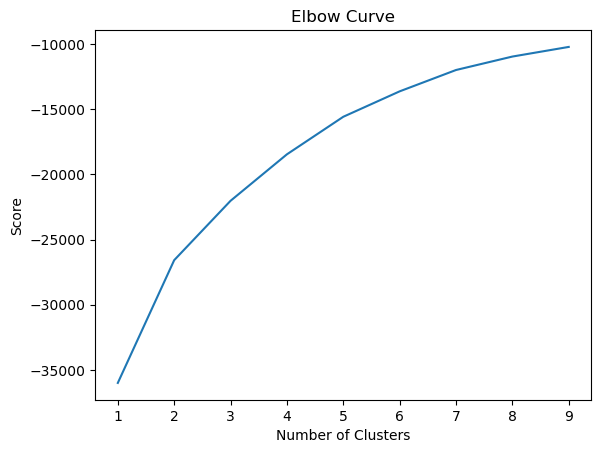

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The is a noticable straighten line on the x-axis after 5. Therefore, the optimal count for clusters is five.

#### 4. k-means clustering

In [14]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 5) 

In [15]:
# Fit the k-means object to the data.
kmeans.fit(df1)

KMeans(n_clusters=5)

In [16]:
df1['clusters'] = kmeans.fit_predict(df1)

In [17]:
df1.head()

,Length,Width,7days_views,EUR Price,Year Built,Total_views,clusters
0,-1.410053,-1.767432,-0.526456,-0.362463,1.023767,0.722640,2
1,-1.502894,-1.804778,-0.625699,-0.362606,0.946295,0.722640,2
2,-1.337844,-1.534021,0.430944,-0.362338,-1.532784,1.875586,1
3,-1.265634,-1.300610,-0.561483,-0.362447,-0.215773,-0.158971,3
4,-1.327528,-1.627386,-0.304620,-0.360579,1.023767,1.875586,2


In [18]:
df1['clusters'].value_counts()

3    2395
4    1604
2    1350
1     591
0      61
Name: clusters, dtype: int64

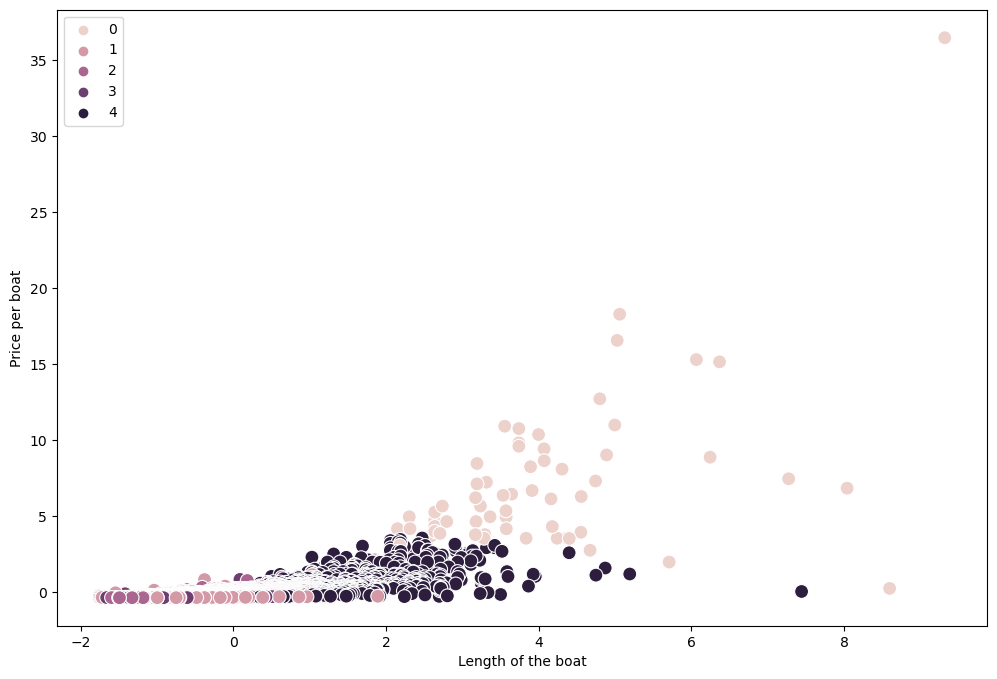

In [19]:
# Plot the clusters for the "EUR_price" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Length'], y=df1['EUR Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of the boat') # Label x-axis.
plt.ylabel('Price per boat') # Label y-axis.
plt.show()

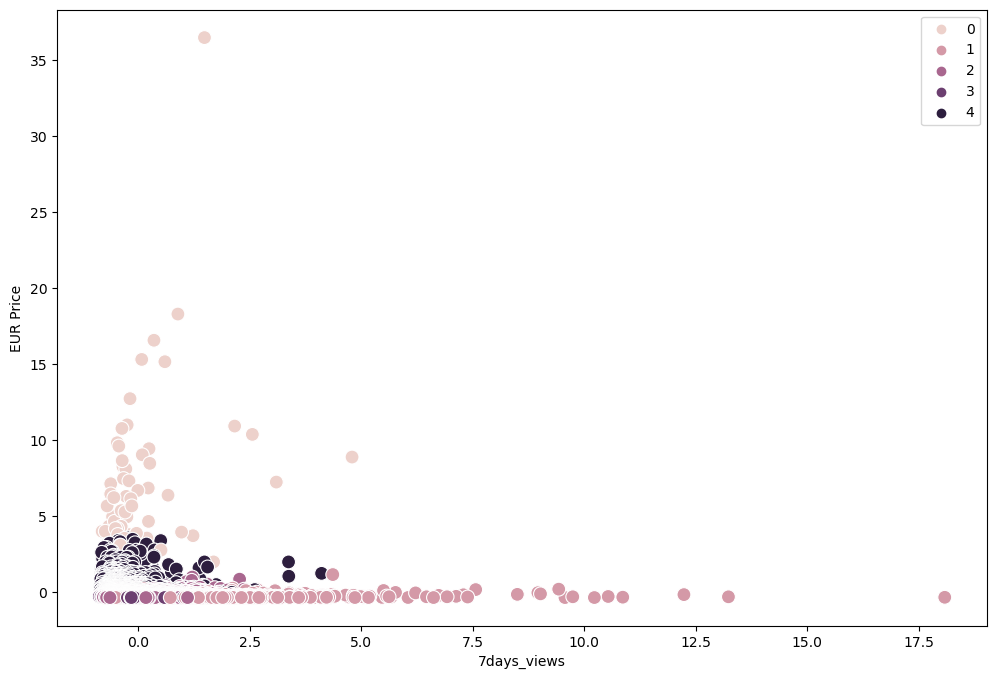

In [20]:
# Plot the clusters for the "7days_views" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['7days_views'], y=df1['EUR Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('7days_views') 
plt.ylabel('EUR Price') 
plt.show()

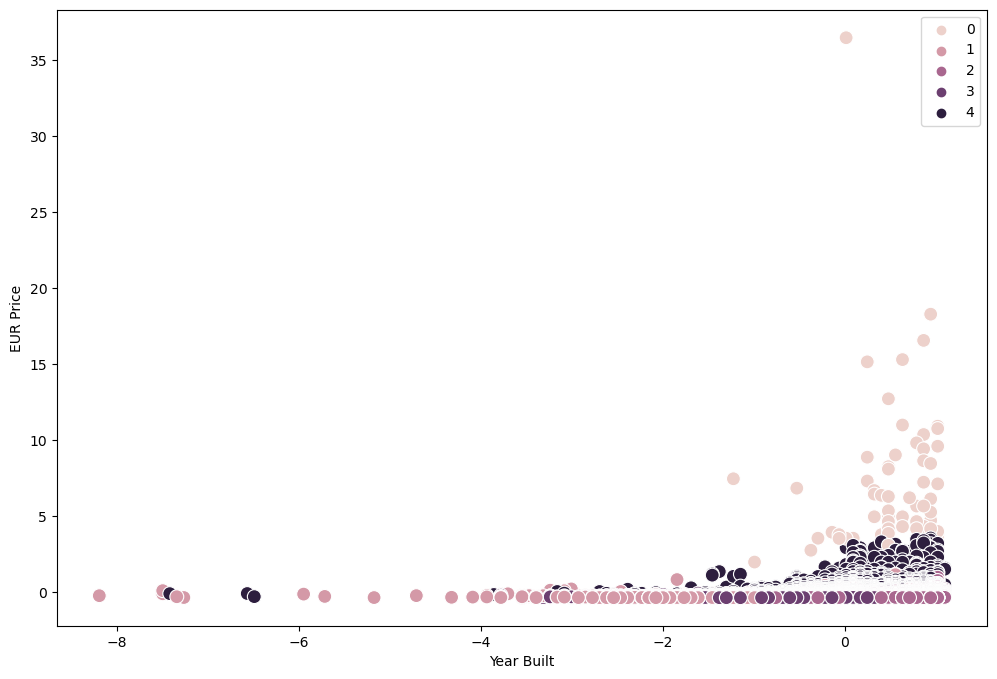

In [21]:
# Plot the clusters for the  Euro Price and Year of built.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Year Built'], y=df1['EUR Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('EUR Price') # Label y-axis.
plt.show()

#### Explaining the graph
The two graphs does not entirely makes sense or give a great insight to the relationship between the cost of the boat and either of the Length or Views of each boat. This gives a suggestion that there are other important factors that are inclusively and would all together be determinant of the boat price

In [22]:
df1.loc[df1['clusters'] == 4, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 3, 'cluster'] = 'dent purple'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'whitish purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'whitish pink'

In [23]:
df1.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         '7days_views':['mean', 'median'],
                          'EUR Price':['mean', 'median'],
                          'Year Built':['mean', 'median'],
                          'Total_views':['mean', 'median']})

Length               Width           7days_views            \
                    mean    median      mean    median        mean    median   
cluster                                                                        
dark purple     1.129183  0.880022  1.159805  1.010160   -0.357087 -0.456403   
dent purple    -0.317203 -0.316594 -0.292644 -0.366965   -0.271367 -0.368836   
purple         -0.721859 -0.811745 -0.753868 -0.833788    0.070112 -0.018567   
whitish pink    4.071483  3.739522  3.463120  3.031501    0.101826 -0.257917   
whitish purple -0.550524 -0.663200 -0.597249 -0.787105    1.898190  1.388345   

               EUR Price           Year Built           Total_views            
                    mean    median       mean    median        mean    median  
cluster                                                                        
dark purple     0.360102  0.141616  -0.057353  0.016641   -0.566433 -0.708738  
dent purple    -0.230819 -0.262105  -0.104240 -0.060831   -0.563782 -0.539603  
purple         -0.220022 -0.278724   0.821653  0.946295    1.168698  0.722640  
whitish pink    7.162216  5.668282   0.485278  0.481468   -0.771756 -0.733513  
whitish purple -0.278610 -0.316980  -1.348872 -1.222899    1.232063  1.875586

#### Explanations
The data does not provide a deep understanding of the relationship between the columns. However, the whitish purple cluster showed the best statistics of all lots. The average number of lengths, widths and prices is the highest and significantly higher than the other four. This is because the length and width determine the size of the boat, and this may be proportional to the price. In general, there are other important variables to consider when evaluating the price of boats.
This analysis provided a deeper understanding of the need to further explore other categorical variables in the data frame to discover the actual determinant of value or views received by each boat.  

The descriptive statistics of the clusters helps provide a clearer insight into the data as opposed to the scatterplots. We can see that purple clearly has the best stats overall and it along with the rest of the cluster stats indiacte that boat size is at least somewhat related to boat price. Another thing we can see with the dark purple (largest boats) is that 7days_views is skewed to the right as the mean is much higher than the median. 

In [24]:
# Exporting df
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.csv'))